In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Basic data visualization and analysis <a class='tocSkip'></a>
## With Python <a class='tocSkip'></a>
## Version 0.4 - September 2020 (English)<a class='tocSkip'></a>

> Here we'll show some basic commands for use to visualize data and do simple analysis.  
>
> After each first use of a Python construct, _NumPy_, _MatPlotLib_, or _SciPy_ feature we will give a reference to the official documentation so that you can quickly look up more information.  Thus, we will often _not_ explain in details what these do, but illustrate their use. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

### Christian Holm Christensen <a class='tocSkip'></a>

# Grundlæggende data visualisering og analyse <a class='tocSkip'></a>
## Med Python <a class='tocSkip'></a>
## Version 0.4 - september 2020 (dansk)<a class='tocSkip'></a>

> Her viser vi nogle grundlæggende kommandoer til brug for at visualisere data og foretage simpel analyse.
>
> Efter første brug af en Python-konstruktion, _NumPy_, _MatPlotLib_ eller _SciPy_ funktionen vil vi give en henvisning til den officielle dokumentation, så du hurtigt kan finde mere information. Vi vil ofte _ikke_ forklare i detaljer hvad de gør, men illustrerer deres brug.
>
> Dette dokument er tilgængleligt i mange formatter på  https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction

In this short note, we will _briefly_ show how to do some basic data analysis and visualisation.  A more thorough treatment of the subject - but still oriented toward the practical use of Python - can be found in the book _Statistics Overview_ (see [here](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)).  There, one can find the module `nbi_stat` with various utilities to help with data analysis and visualisation. 

# Introduktion

I denne korte note vil vi _kort_ vise, hvordan man udfører grundlæggende dataanalyser og visualisering. En mere grundig behandling af emnet - men stadig orienteret mod den praktiske anvendelse af Python - kan findes i bogen _Statistik Oversigt_ (se [her](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)). Der kan man finde modulet `nbi_stat` med forskellige værktøjer til hjælp med dataanalyse og visualisering.

# Data

Suppose we have a list of $(x,y)$ values 

Antag, at vi har en liste $(x,y)$ værdier

$$ (x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N)\quad.$$

We want to input these into Python.  We simply do that by making a list of the pairs

Vi ønsker at indsætte disse i Python. Det gør vi ved at lave en liste over parrene

In [2]:
from numpy import array
d = array([[0., -0.1 ], [1., 0.98], [2., 1.6 ], [ 3., 2.94],
              [4.,  4.05], [5., 5.1 ], [6., 6.4 ], [ 7., 6.45],
              [8.,  7.93], [9., 8.92]])

- [`numpy.array`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

The first column is our $x$ values and the second is our $y$ values.  We may want to split these into separate lists.  We do that by sub-indexing the data array `d`

Den første kolonne er vores $x$ værdier, og den anden er vores $y$ værdier. Vi ønsker måske at opdele disse i separate lister. Det gør vi ved at sub-indeksere datarammen `d`

In [3]:
x = d[:,0]
y = d[:,1]
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[-0.1   0.98  1.6   2.94  4.05  5.1   6.4   6.45  7.93  8.92]


- [`print`](https://docs.python.org/3/library/functions.html#print)

To loop over the data, we will generally use _NumPy_ functionality.  For example, to calculate $\sin(x)$ for all values of $x$, we do  

For at løbe over data bruger vi normalt _NumPy_ funktionalitet. Vi kan, for eksempel, beregne $\sin(x)$ for alle $x$-værdier ved 

In [4]:
from numpy import sin
sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

- [`numpy.sin`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html)
- [_NumPy_ math functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

Only rarely do we need to _explicitly_ loop over data in an array.  Suppose, however, that we want to calculate 

$$d_i = \sqrt{x_i^2+y_i^2}\quad,$$

for every data point above. Although there is _NumPy_ functions for this, we could imagine more complex calculations for which we need to do such iterations.  We will do this using a _list comprehension_.  The syntax of a list comprehension is 

Kun sjældent er vi nødt til at _eksplicit_ løbe over data. Antag dog, at vi vil beregne

$$d_i = \sqrt{x_i^2+y_i^2}\quad,$$

for hvert datapunkt ovenfor. Selvom der er _NumPy_ -funktioner til dette, kunne vi forestille os mere komplekse beregninger, hvor vi har brug for sådanne iterationer. Vi gør dette ved hjælp af en _listeforståelse_ (enlg. _list comprehension_). Syntaksen for en listeforståelse er

> `[` _calculation on element_ `for` _element_ `in` _data_ `]`

where _data_ is the data we are looping over, _element_ takes on every value in _data_ - one by one -, and _calculation on element_ is what we want to calculate.  A list comprehension is a _mapping_ of data into some other data in an almost strictly mathematical sense 

$$f:X\rightarrow Y\quad.$$

Let us see how this works in the example above 

hvor _data_ er de data, vi løber over, _element_ påtager sig hver værdi i _data_ - en ad gangen -, og _calculation on element_  er det, vi vil beregne. En listeforståelse er en _afbildning_ af data over i andet data i næsten strengt matematisk forstand

$$f:X\rightarrow Y\quad.$$

Lad os se, hvordan dette fungerer i eksemplet ovenfor

In [5]:
from numpy import sqrt
[sqrt(x**2 + y**2) for x,y in d]

[0.1,
 1.400142849854971,
 2.5612496949731396,
 4.200428549564913,
 5.6923193866823745,
 7.142128534267638,
 8.772684879784524,
 9.51853455107455,
 11.264319775290472,
 12.671479787301875]

- [List comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)

One limitation of _list comprehensions_ is that we cannot have _side effects_.  That is, we cannot change other data, print to screen, or in any other way change _state_.  If we need that (and _only_ if we need that), do use a regular `for` loop to traverse the data.  

En begrænsning af _listeforståelser_ er, at vi ikke kan have _bivirkninger_. Det vil sige, vi kan ikke ændre andre data, udskrive til skærm eller på anden måde ændre _tilstand_. Hvis vi har brug for det (og _kun_ hvis vi har brug for det), kan vi bruge en almindelig 'for'-løkke til at løbe over data.

Suppose we not only want to calculate the Euclidean distance as above, but also want to sum those, then, we could do

Antag, at vi ikke kun ønsker at beregne den euklidiske afstand som ovenfor, men også ønsker at opsummere dem, så kan vi gøre

_Do not ever do this! It is merely an example to illustrate a `for` loop_.

_Gør aldrig dette! Det er blot et eksempel for at illustrere en 'for'-løkke_.

In [6]:
sum = 0 
for xi,yi in d: 
    sum += sqrt(xi**2+yi**2)
print('Sum is ',sum)

Sum is  63.323288008794464


The above exact calculation is better done using _NumPy_ by 

Ovenstående nøjagtige beregning gøres bedre ved hjælp af _NumPy_ af

In [7]:
sqrt(d[:,0]**2+d[:,1]**2).sum()

63.323288008794464

# Mean and uncertainty

# Middelværdi og usikkerhed

Let us calculate the mean of the $x$ and $y$ values above 

Lad os beregne middelværdien af $x$ og $y$ værdierne ovenover

\begin{align*}
  \bar{x} &= \frac1N\sum_{i=1}^{N} x_i
  &
  \bar{y} &= \frac1N\sum_{i=1}^{N} y_i\quad,
\end{align*}

where $N$ is the sample size and $x_i,y_i$ are the individual samples. 

hvor $N$ er prøvens størrelse og $x_i,y_i$ er de enkelte prøver.

In [8]:
mean_x = x.mean()
mean_y = y.mean()
print(mean_x,mean_y)

4.5 4.4270000000000005


- [`numpy.ndarray.mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.mean.html)

We must also calculate the uncertainty on the means.  The uncertainty on the mean is given by 

Vi skal også beregne usikkerhederne på middelværdierne. Usikkerheden på middelværdien er givet af

\begin{align*}
  \delta_{\bar x} &= \frac{\sqrt{s^2_x}}{\sqrt{N}} 
   = \frac{1}{\sqrt{N}}\sqrt{\frac{1}{N-1}\sum_{i=1}^{N} \left(x_i - \bar x\right)^2}\quad,
\end{align*}

and similarly for $y$. 

Here, $s_x^2$ is the _variance_ of the $x$ sample, and $\sqrt{s_x^2}$ is the _standard deviation_ of the same sample.   Let us calculate those uncertainties. 

og tilsvarende for $y$.

Her er $s_x^2$ _variansen_ af $x$-prøven, og $\sqrt{s_x^2}$ er _standardafvigelsen_ af samme prøve. Lad os beregne disse usikkerheder.

In [9]:
unc_x = x.std() / sqrt(len(x))
unc_y = y.std() / sqrt(len(y))
print(unc_x,unc_y)

0.9082951062292475 0.9144233702175376


- [`numpy.ndarray.std`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.std.html)
- [`len`](https://docs.python.org/3/library/functions.html#len)

Thus, we may write our result as 

Således kan vi skrive vores resultat som

In [10]:
print(f"mean x = {mean_x:.1f} +/- {unc_x:.1f}")
print(f"mean y = {mean_y:.1f} +/- {unc_y:.1f}")

mean x = 4.5 +/- 0.9
mean y = 4.4 +/- 0.9


- [`str.format`](https://docs.python.org/3/library/stdtypes.html#str.format)

Note, we round the numbers so that we have _one_ significant digit on the uncertainty and give the value at the same _precision_ (number of digits following the decimal mark). 

Bemærk, vi afrunder tallene, så vi har _et_ signifikant ciffer på usikkerheden og giver værdien med samme _præcision_ (antal cifre efter decimaltegnet).

# Reading data

# Læsning af data

Suppose we have text file `counts.dat` containing the number of counts from a Geiger counter as a function of the distance from a source, with content like 

Antag, at vi har tekstfil `counts.dat`, der indeholder antallet af tællinger fra en Geiger-tæller som funktion af afstanden til en kilde, med indhold _a la_

In [11]:
def genTxtFile(filename,sep='\t'):
    def printOne(l,file,sep,std=True,dummy=True):
        s = sep.join([str(e) for e in l])
        print(s,file=file)
        if std:
            print(s)
        elif dummy:
            print('...')
            dummy = False
        return dummy
    
    txtdata = [[0.20,   901],
               [0.25,   652],
               [0.30,   443],
               [0.35,   339],
               [0.40,   283],
               [0.45,   281],
               [0.50,   240],
               [0.60,   220],
               [0.75,   180],
               [1.00,   154]]
    with open(filename,'w') as file:
        d = True
        d = printOne(['Distance','Counts'],file,sep,True,d)
        for i,l in enumerate(txtdata):
            d = printOne(l,file,sep,i in [0,1,len(txtdata)-1],d)
genTxtFile('counts.dat')
hide_toggle()

Distance	Counts
0.2	901
0.25	652
...
1.0	154


We can read this into an array of data by 

Vi kan læse dette ind i et felt ved hjælp af

In [12]:
from numpy import loadtxt
data = loadtxt('counts.dat',skiprows=1)
print(data)

[[2.00e-01 9.01e+02]
 [2.50e-01 6.52e+02]
 [3.00e-01 4.43e+02]
 [3.50e-01 3.39e+02]
 [4.00e-01 2.83e+02]
 [4.50e-01 2.81e+02]
 [5.00e-01 2.40e+02]
 [6.00e-01 2.20e+02]
 [7.50e-01 1.80e+02]
 [1.00e+00 1.54e+02]]


- [`numpy.loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

Other formats can also be read in. For example a _comma separated values_ file `counts.csv`

Andre formater kan også læses i. F.eks. En _kommasepareret værdier_ fil `counts.csv`

In [13]:
genTxtFile('counts.csv',',')
hide_toggle()

Distance,Counts
0.2,901
0.25,652
...
1.0,154


We can read this file by passing `delimiter=','` 

Vi kan læse denne fil ved at give argumentet `delimiter=','`

In [14]:
data = loadtxt('counts.csv',delimiter=',',skiprows=1)
print(data)

[[2.00e-01 9.01e+02]
 [2.50e-01 6.52e+02]
 [3.00e-01 4.43e+02]
 [3.50e-01 3.39e+02]
 [4.00e-01 2.83e+02]
 [4.50e-01 2.81e+02]
 [5.00e-01 2.40e+02]
 [6.00e-01 2.20e+02]
 [7.50e-01 1.80e+02]
 [1.00e+00 1.54e+02]]


Note, the filename ending, `.dat` and `.csv` are completely arbitrary and _do not_ reflect the format of the content.  It is always best to inspect the file and not make assumptions about the file format. 

Bemærk, at slutningen af  filnavnet, for eksempel '.dat' og '.csv', er helt vilkårligt, og _afspejler ikke_ indholdets format. Det er altid bedst at inspicere filen og ikke lave antagelser om filformatet.

# Visualization of data

# Visualisering af data

We would like to visualize the data.  That is we want to plot $y$ as a function of $x$.  

Vi vil gerne visualisere dataene. Det er, vi vil tegne $y$ som funktion af $x$.

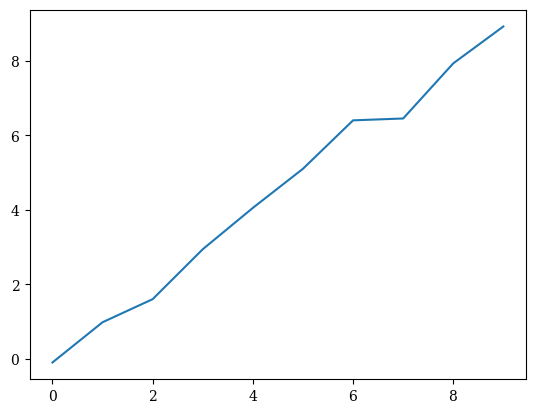

In [15]:
from matplotlib.pyplot import plot
plot(x,y);

- [`matplotlib.pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

We must remember to label our axes, so let's do that 

Vi skal huske at mærke vores akser, så lad os gøre det

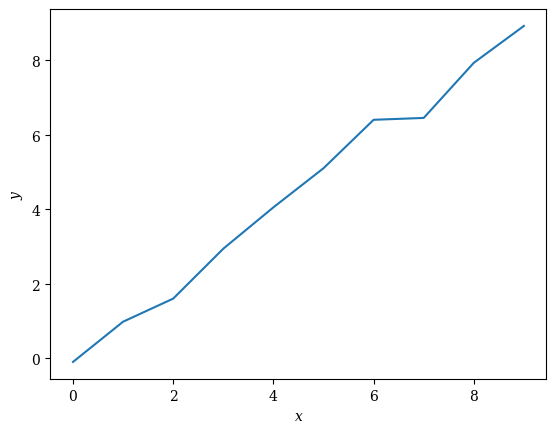

In [16]:
from matplotlib.pyplot import xlabel, ylabel
plot(x,y)
xlabel(r'$x$')
ylabel(r'$y$');

- [`matplotlib.pyplot.xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.htm)
- [`matplotlib.pyplot.ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.htm)

Note that we have used $\mathrm{\LaTeX}$ to format our labels nicely.  This is done by preceeding the string by an `r` and putting the text between `$...$`.  

Bemærk at vi har brugt $\mathrm{\LaTeX}$ til at formatere vores etiketter pænt. Dette gøres ved at foregribe strengen med en `r` og sætte teksten mellem` $...$`.

Let's also add a legend and a title to explain what it is we see in the figure.  

Lad os også tilføje en tegnforklaring og en titel for at forklare, hvad det vi ser i figuren.

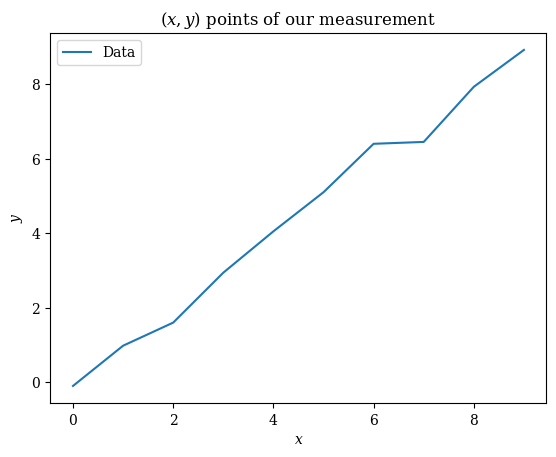

In [17]:
from matplotlib.pyplot import title, legend 
plot(x,y,label='Data')
title(r'$(x,y)$ points of our measurement')
xlabel(r'$x$')
ylabel(r'$y$')
legend();

- [`matplotlib.pyplot.legend`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.htm)
- [`matplotlib.pyplot.title`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.htm)

The plots above seem to suggest that there's a local linear relation between $x$ and $y$ because we've drawn the points with connecting lines.   It is more honest to draw the data points as just that: points.  We can do that by passing additional arguments to `matplotlib.pyplot.plot`.  Let's draw our data with different styles to illustrate this.   Please look at the legend and the code to see which plot corresponds to which option.  Note that we add constants to the $y$ values to separate the graphs from each other. 

Graferne ovenover synes at antyde at der er et lokal lineært forhold mellem $x$ og $y$, fordi vi har trukket linjer mellem punkterne. Det er mere ærligt at tegne datapunkterne som bare det: punkter. Det kan vi gøre ved at give yderligere argumenter til `matplotlib.pyplot.plot`. Lad os tegne vores data med forskellige stilarter for at illustrere dette. Se tegnforklaringen og koden for at se, hvilket plot der svarer til hvilke indstillinger. Bemærk at vi ligger konstanter til $y$-værdierne for at adskille graferne fra hinanden.

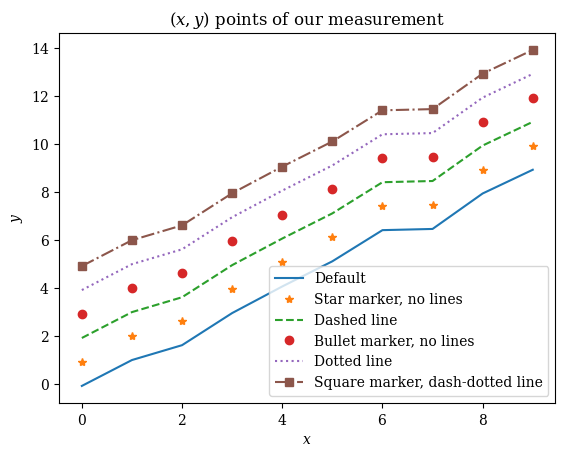

In [18]:
plot(x,y+0,label='Default')
plot(x,y+1,'*',label='Star marker, no lines')
plot(x,y+2,'--',label='Dashed line')
plot(x,y+3,'o',label='Bullet marker, no lines')
plot(x,y+4,':',label='Dotted line')
plot(x,y+5,'s-.',label='Square marker, dash-dotted line')
title(r'$(x,y)$ points of our measurement')
xlabel(r'$x$')
ylabel(r'$y$')
legend();

_MatPlotLib_ chooses unique colors automatically.  However, if we want specific colors we can also specify that.  See the documentation of  [`matplotlib.pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html). 

_MatPlotLib_ vælger automatisk unikke farver. Hvis vi ønsker specifikke farver, kan vi også angive det. Se dokumentationen for [`matplotlib.pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

# Sampling and histograms

# Prøveudtagning og histogrammer

Suppose we have measured a value $x$ some number of times (say $N$ times).  For the benefit of the discussion here, we will sample a normal distribution (sometimes called a Gaussian distribution)

Antag, at vi har målt en værdi $x$ flere gange (lad os sige $N$ gange). Til gavn for denne diskussionen vil vi udtrække værdier fra en normal fordeling (nogle gange kaldet en Gaussisk fordeling)

$$ f_N(x) = \frac1{\sqrt{2\pi}}e^{-\frac12x^2}\quad.$$

That is, we draw $N=1\,000$ random numbers from this distribution.

Vi tager $N=1\,000$ tilfældige tal fra denne distribution.

In [19]:
from numpy.random import default_rng
r = default_rng()
x = r.normal(size=1000)

- [`numpy.random.Generator`](https://numpy.org/doc/stable/reference/random/generator.html)

Now we would like to see what the distribution of our measurements is.  We do that by counting how many times we have seen a value in a given interval - also called a _bin_.  That is, we determine how many times we have a value $x_i$ such that it lies in the semi-open interval between our bin edges $b_j$ and $b_{j+1}$  

Nu vil vi gerne se, hvordan vores målinger fordeler sig. Det gør vi ved at tælle hvor mange gange vi har set en værdi i et givet interval - også kaldet en _bin_. Det vil sige, vi bestemmer hvor mange gange vi har en værdi $x_i$ sådan, at den ligger i det halvåbne interval mellem vores intervals endepunkter $b_j$ og $b_{j+1}$

$$x_i \in [b_j;b_{j+1})\quad.$$

To decide which intervals we want to look at, we determine the least and largest values we've seen

For at bestemme hvilke intervalgrænser vi vil se på besterme vi den mindste og største værdi vi har set

In [20]:
min_x = x.min()
max_x = x.max()
print(min_x,max_x)

-3.5464530159441576 3.2022796577305033


- [`numpy.ndarray.min`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html)
- [`numpy.ndarray.max`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html)

We want to divide this range into ranges of size 0.50. We calculate the number of bins we need as 

Vi ønsker at opdele dette interval i under intervaller af længden  0,50. Vi beregner antallet af intervaller (_bins_) med

$$ n = \left\lceil\frac{\max x - \min x}{0.50}\right\rceil\quad,$$

where $\lceil\cdot\rceil$ means round-up to nearest whole number.

hvor $\lceil\cdot\rceil$ betyder runde op til nærmeste hele tal.

In [21]:
from numpy import ceil
n = int(ceil((max_x-min_x) / 0.50))
print(n)

14


- [`numpy.ceil`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ceil.html)
- [`int`](https://docs.python.org/3/library/functions.html?highlight=int)

Note, we force `n` to be integer by _casting_ with the function (or type) `int`.

Bemærk at vi tvinger `n` til at være et heltal ved _casting_ med funktionen (eller typen)` int`.

We now define our bins by

Vi definerer nu vores intervaler med

In [22]:
from numpy import linspace
bins = linspace(min_x,max_x,n+1)

- [`numpy.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

We are now all set to count how many times we have number in each of the bins

Vi er nu klar til at tælle, hvor mange gange vi har nummer i hver af interval

In [23]:
from numpy import histogram
counts, _ = histogram(x,bins)

- [`numpy.histogram`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)

We can print out a table of each interval and how many counts we have in each interval

Vi kan udskrive en tabel over hvert interval og hvor mange tællinger vi har i hvert interval

In [24]:
for bl,bh,c in zip(bins[:-1],bins[1:],counts):
    print(f'{bl:6.3f} to {bh:6.3f} has {c:3} counts')

-3.546 to -3.064 has   2 counts
-3.064 to -2.582 has   4 counts
-2.582 to -2.100 has  21 counts
-2.100 to -1.618 has  37 counts
-1.618 to -1.136 has  74 counts
-1.136 to -0.654 has 138 counts
-0.654 to -0.172 has 183 counts
-0.172 to  0.310 has 177 counts
 0.310 to  0.792 has 148 counts
 0.792 to  1.274 has 112 counts
 1.274 to  1.756 has  55 counts
 1.756 to  2.238 has  33 counts
 2.238 to  2.720 has  11 counts
 2.720 to  3.202 has   5 counts


- [`for`](https://docs.python.org/3/tutorial/controlflow.html#for-statements)
- [`zip`](https://docs.python.org/3/library/functions.html#zip)

We visualize this type of data - raw counts - by a _bar-chart_. Such a representation underlines that we are dealing with _counts_ rather than probabilities as we will see later

Vi visualiserer denne type data - rå tællinger - ved hjælp af et _pinde-diagram_ (_bar-chart_). En sådan repræsentation understreger, at vi beskæftiger os med _tællinger_ snarere end sandsynligheder, som vi vil se senere

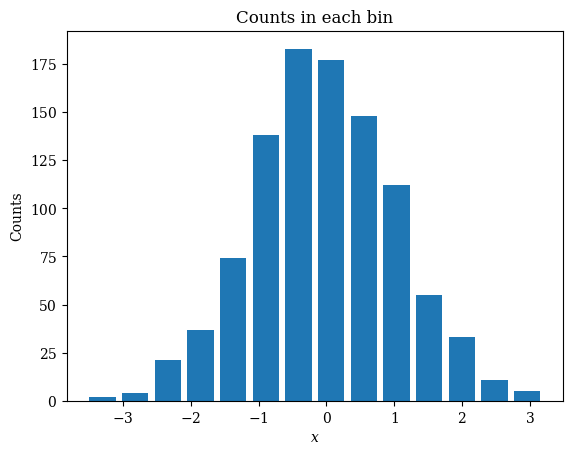

In [25]:
from matplotlib.pyplot import bar
from numpy import diff
bar((bins[1:]+bins[:-1])/2,counts,0.8*diff(bins))
xlabel(r'$x$')
ylabel('Counts')
title('Counts in each bin');

- [`numpy.diff`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html)
- [`matplotlib.pyplot.bar`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

The uncertainty on each number of counts is given by 

Usikkerheden på hvert antal tællinger er givet ved

$$\delta_{n_i} = \sqrt{n_i}\quad,$$ 

so we will plot the data with that information too

så vi vil også plotte dataene med disse oplysninger

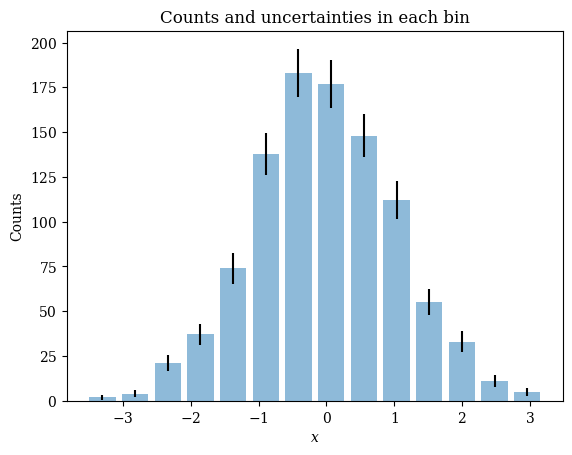

In [26]:
bar((bins[1:]+bins[:-1])/2,counts,0.8*diff(bins),yerr=sqrt(counts),alpha=.5)
xlabel(r'$x$')
ylabel('Counts')
title('Counts and uncertainties in each bin');

- [`numpy.sqrt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html)
- [`matplotlib.pyplot.errorbar`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html)

Note that we've made the bars semitransparent by passing `alpha=0.5` ($\alpha=1$ is fully opaque, and $\alpha=0$ is fully transparent).  

Bemærk, at vi har lavet søjlerne semitransparente ved at passere `alpha = 0.5` ($\alpha=1$ er helt uigennemsigtig, og $\alpha=0$ er fuldt gennemsigtig).

To turn this into a proper _histogram_ we need to divide the number of counts in each bin by the width of that bin, and similarly for the uncertainties.   We calculate the width of each bin as 

For at gøre dette til et egentligt _histogram_ skal vi dividere antallet af tællinger i hvert interval med længden af det interval og tilsvarende for usikkerhederne. Vi beregner bredden af hver interval ved

$$ \delta_{j} = b_{j+1}-b_j\quad,$$ 

using the function [`numpy.diff`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html).  We also calculate the mid points of each bin by 

ved hjælp af funktionen [`numpy.diff`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html). Vi beregner også midtpunkterne for hvert interval ved

$$ \bar b_j = \frac{b_j + b_{j+1}}2\quad,$$

via [_slices_](https://docs.scipy.org/doc/numpy/user/basics.indexing.html#other-indexing-options) in the `bins` array. 

via [_skiver_](https://docs.scipy.org/doc/numpy/user/basics.indexing.html#other-indexing-options) i `bins` datarammen.

In [27]:
wb = diff(bins)
mb = (bins[:-1]+bins[1:])/2
h  = counts / wb
e  = sqrt(h) / wb

Let us plot this.  Note that the ordinate ($y$-axis) is now 

Lad os tegne dette. Bemærk at ordinaten ($y$-akse) er nu

$$\frac{\mathrm{d}N}{\mathrm{d}x}\quad,$$

that is a _density_, proportional to the probability _density_ of our sample 

altså en _tæthed_, proportional med sandsynligheds _tætheden_ af vores prøve

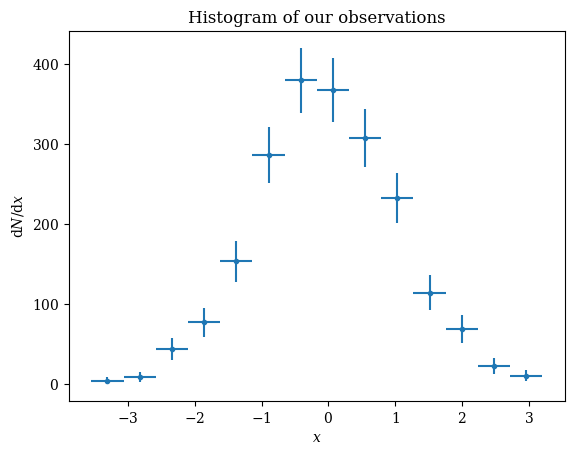

In [28]:
from matplotlib.pyplot import errorbar
errorbar(mb,h,e,wb/2,'.')
title("Histogram of our observations")
xlabel(r'$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$');

This means that 

Det betyder at

$$P(x\in[b_j,b_{j+1}])\propto \int_{b_j}^{b_{j+1}}\mathrm{d}x\,\frac{\mathrm{d}N}{\mathrm{d}x} = h_j\cdot (b_{j+1}-b_j) = \text{Area under point}\quad.$$

## Difference between bar-chart and histogram

## Forskel mellem pinde-diagram og histogram

To illustrate the difference between a bar-chart and histogram we will plot them side-by-side

For at illustrere forskellen mellem et pinde-diagram og et histogram, vil vi tegne dem side om side

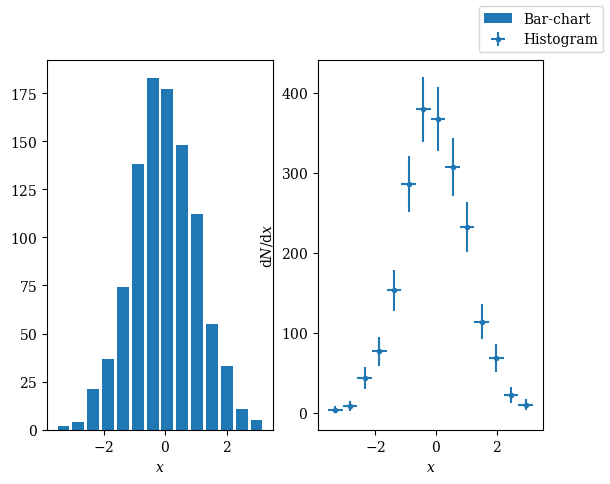

In [29]:
from matplotlib.pyplot import subplots
fig, ax = subplots(ncols=2)
ax[0].bar(mb,counts,.8*wb,label='Bar-chart')
ax[0].set_xlabel(r'$x$')
ax[1].set_ylabel('Counts')
ax[1].errorbar(mb,h,e,wb/2,'.',label='Histogram')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
fig.legend();

- [`matplotlib.pyplot.subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [`matplotlib.pyplot.Figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html)
- [`matplotlib.pyplot.Axes`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html)

# Curve fitting

# Kurvetilpasning

Often we have a sample of data which we would like to fit our hypothesis to, to see if our hypothesis is consistent with the sample.  A technique used often in Physics is to do _curve fitting_ of our hypothesis function to the data, and then use the $\chi^2$ estimator to evaluate how well our hypothesis describes the data. 

Ofte har vi en stikprøve af data, som vi gerne vil passe vores hypotese til, for at se, om vores hypotese er i overensstemmelse med prøven. En teknik, der ofte bruges i fysik, er  _kurvepasning_ af vores hypotesefunktion til dataene og derefter bruge $\chi^2$-estimatoren til at evaluere, hvor godt vores hypotese beskriver dataene.

We have a data sample 

Vi har en stikprøve

$$D=\left\{(x_i,y_i,\delta_i)|i=\{1,2,\ldots,N\}\right\}\quad,$$

which are tuples of the independent variable $x$, the dependent variable $y$, and the uncertainty in $y$, which we will test a hypothesis $H$ against. 

som er tupler af den uafhængige variabel $x$, den afhængige variabel $y$ og usikkerheden i $y$, som vi vil teste en hypotese mod. 

The hypothesis $H$ is expressed by the function

Hypotesen $H$ er udtrykt som ved funktionen

$$f:X\rightarrow Y\quad,$$

that maps the independent variable $x\in X$ into the dependent variable $y\in Y$. We can evaluate the $\chi^2$ estimator as 

der afbilleder den uafhængige variabel $x\in X$ ind i den afhængige variabel $y\in Y$. Vi kan evaluere $\chi^2$ estimator ved

$$\chi^2 = \sum_{i=1}^{N}\frac{\left(y_i-f(x_i)\right)^2}{\delta_i^2}\quad.$$

The _number of degrees of freedom_ $\nu$ (sometimes denoted $\mathrm{NDF}$ or $\mathrm{DoF}$) is defined as  

_Antallet af frihedsgrader_ $\nu$ (undertiden betegnet $\mathrm{NDF}$ eller $\mathrm{DoF}$) er defineret ved

$$\nu = N-N_{\mathrm{par}}\quad,$$

where $N_{\mathrm{par}}$ is the number of free parameters of the hypothesis function $f$.  We say that, if the _reduced_ $\chi^2$ ($\chi^2/\nu$) is close to one

hvor $N_{\mathrm{par}}$ er antallet af frie parametre for hypotese-funktionen $f$. Vi siger, hvis det _reduceret_ $\chi^2$ ($\chi^2/\nu$) er tæt på én

$$\chi^2/\nu \approx 1\quad,$$

then our hypothesis $H$, described by $f$, is consistent with our data. 

så er vores hypotese $H$, beskrevet af $f$, i overensstemmelse med vores data.

## Example: Normal distribution

## Eksempel: Normal fordeling

Let us do simple example.  We generate our data as $N_{\mathrm{samp}}$ samples of a normally distributed random variable, which we then histogram into 30 bins.  The normal distribution is defined by the [_probability density function_](https://en.wikipedia.org/wiki/Probability_density_function) 

Lad os tage et simpelt eksempel. Vi genererer vores data som $N_{\mathrm{samp}}$-prøver af en normal fordelt tilfældig variabel, som vi derefter histogrammerer i 30 bøtter. Den normale fordeling defineres af [_sandsynlighedstæthedsfunktionen_](https://en.wikipedia.org/wiki/Probability_density_function)

$$P_{\mathrm{N}}(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}\quad,$$

where $\mu$ and $\sigma$ are the mean and spread, respectively, of the distribution.  

hvor $\mu$ og $\sigma$ er henholdsvis gennemsnittet og spredningen af fordelingen.

Let us generate the sample choosing $\mu=0$ and $\sigma=1$

 Lad os generere prøven ved at vælge $\mu=0$ og $\sigma=1$

In [30]:
r  = default_rng(11111)
Ns = 1000
s  = r.normal(size=Ns)

- [`numpy.random.seed`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html)

Note, we set the random number [_seed_](https://en.wikipedia.org/wiki/Random_seed) to ensure reproducibility of the sample. 

We now want to histogram this data.  We will create 30 bins ($N=30$) between -3 and 3, using the function `numpy.linspace`.

Bemærk, vi sætter det tilfældigt tal _frø_ ([_seed_](https://en.wikipedia.org/wiki/Random_seed)) for at sikre reproducerbarheden af vores prøve.

Vi ønsker nu at histogrammerer disse data. Vi opretter 30 bøtter ($N=30$) mellem -3 og 3 ved hjælp af funktionen `numpy.linspace`.

In [31]:
b = linspace(-3,3,31)

The midpoint of each bin (our $x_i$'s) is given by the average between neighboring bin-boundaries 

Midtpunktet for hver bøtte (vores $x_i$'er) er givet ved gennemsnittet mellem nabo bøtte grænser

In [32]:
x = (b[1:]+b[:-1])/2

To get the (relative) frequency of counts (our $y_i$'s) within each bin, we use the function `numpy.histogram` to which we pass our $N_{\mathrm{samp}}$ observations and our bin boundaries.  This function will return how many times we have an observation within each bin. 

For at få den (relative) frekvens af tællinger (vores $y_i$'er) inden for hver bøtte, bruger vi funktionen `numpy.histogram`, som vi giver vores $N_{\mathrm{samp}}$ observationer og vores bøtte-grænser. Denne funktion returnerer hvor mange gange vi har en observation i hver bøtte.

In [33]:
y, _ = histogram(s,b,density=True)

Note that we pass the option `density=True` to get the _empirical probability density_ $P_{\mathrm{data}}=\mathrm{d}N/\mathrm{d}x$. Using this option, each bin value is calculated as 

Bemærk, at vi giver `density=True` for at få _empirisk sandsynlighedstæthed_ $P_{\mathrm{data}}=\mathrm{d}N/\mathrm{d}x$. Med dette valg er værdien af hver bøtte beregnet som 

$$ y_i = \frac{N_i}{N_{\mathrm{samp}}\Delta_i}\quad,$$

where $N_i$ is the number of observations in bin $i$, $N_{\mathrm{samp}}$ is the sample size, and $\Delta_i$ is the bin width of bin $i$. 

hvor $N_i$ er antallet af observationer i bøtten $i$, $N_{\mathrm{samp}}$ er størrelsen af vores prøve, og $\Delta_i$ er bredden af bøtten $i$. 

 The uncertainties on our observation counts (our $\delta_i$'s) is given by

Usikkerheden på vores observationstællinger (vores $\delta_i$'er) er givet ved

$$\delta_i = \frac{\sqrt{\frac{N_{\mathrm{samp}}\,y_i}{\Delta_i}}}{N_{\mathrm{samp}}}=\sqrt{\frac{y_i}{N_{\mathrm{samp}}\Delta_i}}\quad.$$ 

In [34]:
delta = sqrt(y/len(s)/(b[1:]-b[:-1]))

Let us plot our empirical probability density $\mathrm{d}N/\mathrm{d}x$.  We define a small function to do that, since we will make the same plot later on. 

Lad os tegne vores empiriske sandsynlighedstæthed $\mathrm{d}N/\mathrm{d}x$. Vi definerer en lille funktion til at gøre det, da vi vil gentage dette senere. 

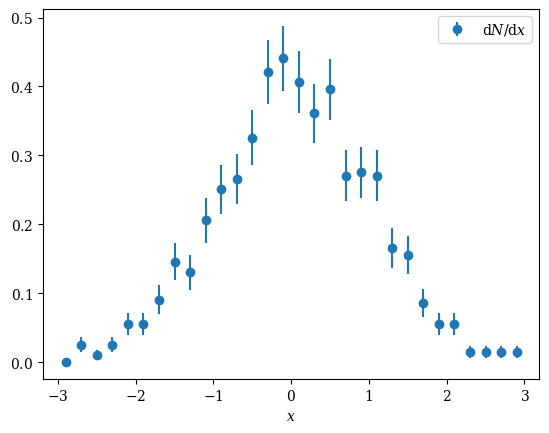

In [35]:
def plotData(x,y,delta):
    errorbar(x,y,delta,fmt='o',label=r'$\mathrm{d}N/\mathrm{d}x$')
    xlabel(r'$x$')

plotData(x,y,delta)
legend();

- [`def`](https://docs.python.org/3/tutorial/controlflow.html#defining-functions)

Our hypothesis is that the data is normal distributed.  That is, our hypothesis $H$ is expressed in the function 

Vores hypotese er, at data er normalfordelt. Det vil sige, vores hypotese $H$ udtrykkes i funktionen

$$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}\quad,$$

where, again, $\mu$ and $\sigma$ are the free parameters mean and spread, respectively, of our hypothesis.  We want to find the best possible value of $\mu$ and $\sigma$ that allows our hypothesis $H$ to come closest to the data.   To do this, we employ the technique of _curve fitting_.   This technique essentially adjusts the free parameter values until we find the lowest possible $\chi^2$. 

To get started, we need to define our hypothesis as a function. 

hvor $\mu$ og $\sigma$ igen er de frie parametre henholdsvis gennemsnit og spredning af vores hypotese. Vi ønsker at finde de bedst mulige værdi for $\mu$ og $\sigma$, der får vores hypotese $H$ til at komme tættest på data. For at gøre dette anvender vi teknikken _kurvetilpasning_. Denne teknik justerer i det væsentlige de frie parameterværdier, indtil vi finder det lavest mulige $\chi^2$.

For at komme i gang er vi nødt til at definere vores hypotese som en funktion.

In [36]:
from numpy import pi, exp
def f(x,mu,sigma):
    return 1/(sqrt(2*pi)*sigma)*exp(-(x-mu)**2/(2*sigma**2))

Let us draw this function.  We do so in a function we because we will draw the function $f$ later on. 

Lad os tegne denne funktion. Det gør vi i en funktion fordi vi vil gentage denne operation senere. 

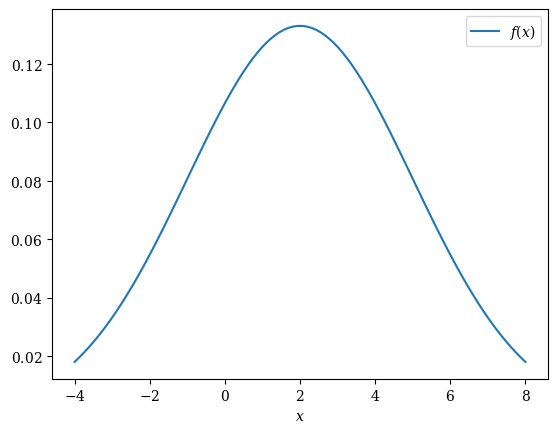

In [37]:
def plotFunc(f,mu,sigma,x):
    plot(x,f(x,mu,sigma),label=r'$f(x)$')
    xlabel(r'$x$')
    
plotFunc(f,2,3,linspace(-4,8,100))
legend();

To do our curve fitting we will use the function `scipy.optimize.curve_fit`.  This function has the parameters 

- $f$ the function 
- $x$ the independent variable values
- $y$ the dependent variable values 
- $p$ initial guess on the parameter values 
- $\delta$ the uncertainties on $y$ 

The function returns the best found values of the parameters $\vec{p}$ and the [_covariance_ matrix](https://en.wikipedia.org/wiki/Covariance_matrix) $C$ of the parameters (essentially how quickly $\chi^2$ changes in any direction of the parameter space).

Note, since we may have $\delta_i=0$ for some $i$s, so we filter out the elements of `x`, `y`, and `delta` for which `delta[i]` is zero - least we do not divide by zero

For at udføre vores kurvetilpasning bruger vi funktionen `scipy.optimize.curve_fit`. Denne funktion tager argumenterne

- $f$ funktionen
- $x$ de uafhængige variabelværdier
- $y$ de afhængige variabelværdier
- $p$ indledende gæt på parameterværdierne
- $\delta$ usikkerhederne på $y$

Funktionen returnerer de bedste fundne værdier for parametrene $\vec{p}$ og [_kovarians_ matricen ](https://en.wikipedia.org/wiki/Covariance_matrix) $C$ af parametrene (i det væsentlige hvor hurtigt $\chi^2$ ændres i en hvilken som helst retning af parameter rummet).

Bemærk, da vi muligvis har $\delta_i=0$ for nogle $i$'er, så filtrerer vi elementerne fra `x`, `y` og `delta`, hvor `delta[i]` er nul på - så vi ikke dividerer med nul

In [38]:
from scipy.optimize import curve_fit

xz = x[delta>0]
yz = y[delta>0]
dz = delta[delta>0]

p, cov = curve_fit(f,xz,yz,(0,1),dz,absolute_sigma=True)

- [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Let us see the result of the fit.  We print out the parameter values and the uncertainties on each parameter.  The uncertainty on parameter $i$ is given by the square root of the covariance matrix element $C_{i,i}$

Lad os se resultatet af tilpasningen. Vi udskriver parameterværdierne og usikkerheden for hver parameter. Usikkerheden for parameter $i$ er givet af kvadratroten af kovariansmatrice elementet $C_{i,i}$

$$ e_i = \sqrt{C_{i,i}}\quad.$$

In [39]:
for n,pv,pe in zip(['mu','sigma'],p,sqrt(cov.diagonal())):
    print(f'{n:6s}: {pv:9.3f} +/- {pe:9.3f}')

mu    :     0.030 +/-     0.031
sigma :     0.979 +/-     0.024


We see that the found values are consistent with our choices of $\mu=0$ and $\sigma=1$ above.   Let us also calculate the (reduced) $\chi^2$. Note, we first calculate the square, scaled residual 

Vi ser, at de fundne værdier er i overensstemmelse med vores valg af $\mu=0$ og $\sigma=1$ ovenfor. Lad os også beregne det (reduceret) $\chi^2$. Bemærk, vi beregner først de kvadreret og skaleret residualer

$$r_i = \left(\frac{y_i-f(x_i)}{\delta_i}\right)^2\quad,$$

but only over the points used in the fit (_i.e._, those where $\delta_i>0$) 

men kun for de punkter, der er brugt i tilpasningen (dvs., dem, hvor $\delta_i>0$)

In [40]:
from numpy import sum
chi2 = sum(((yz - f(xz, *p)) / dz)**2)
nu   = len(xz)-len(p)
print(f'chi^2/nu: {chi2:.1f}/{nu:d}={chi2/nu:.3f}')

chi^2/nu: 19.6/27=0.728


Let us plot our data and the fitted function

Lad os tegne vores data og den tilpasset funktion

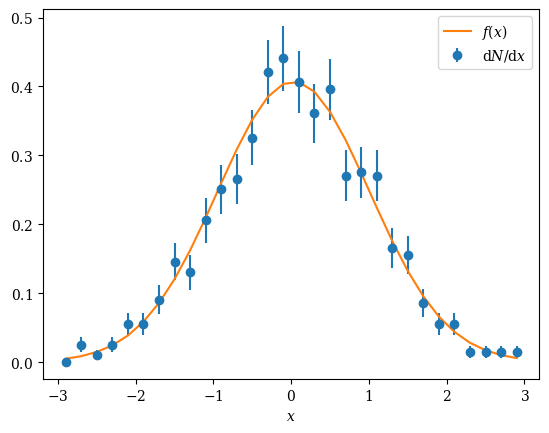

In [41]:
plotData(x,y,delta)
plotFunc(f,*p,x)
legend();

## Example: Curve fitting and sample size

## Eksempel: Kurve tilpasning og prøvestørrelse

Let us do the same thing as in the example above, but this time we will focus on the sample size $N_{\mathrm{samp}}$.  We write a function that takes the sample size as input argument, and then performs all the steps above in one go.   The function will return the $\chi^2$, the number degrees of freedom $\nu$, the parameter values $\vec{p}$, and the covariance matrix $C$. 

Lad os gøre det samme som i eksemplet ovenfor, men denne gang vil vi fokusere på prøvestørrelsen $N_{\mathrm{samp}}$. Vi skriver en funktion, der tager prøvestørrelse som argument, og derefter udfører alle ovenstående skridt på én gang. Funktionen returnerer $\chi^2$, antal frihedsgrader $\nu$, parametreværdierne $\vec{p}$, og kovariansmatricen $C$. 

In [42]:
def exaCurveFit(Ns,plot=True,seed=11111):
    from matplotlib.pyplot import gca 
    r        = default_rng(seed)
    s        = r.normal(size=Ns)
    b        = linspace(-3,3,30)
    x        = (b[1:] + b[:-1]) / 2
    y,_      = histogram(s, b, density=True)
    delta    = sqrt(y / len(s) / (b[1:] - b[:-1]))
    xz,yz,ez = x[delta>0], y[delta>0], delta[delta>0]
    p, cov   = curve_fit(f, xz, yz, [-.5,2], ez, absolute_sigma=True)
    chi2     = sum(((yz - f(xz, *p)) / ez)**2)
    nu       = len(xz)-len(p)
    
    if plot:
        plotData(x,y,delta)
        plotFunc(f,*p,x)
        legend()
        ax = gca()
        tx, ty = .1, .9
        ax.text(tx,ty,fr'$\chi^2/\nu={chi2:.1}/{nu:d}={chi2/nu:.3f}$',
                transform=ax.transAxes)
        for pn,pv,pe in zip([r'\mu',r'\sigma'],
                            p,sqrt(cov.diagonal())):
            ty -= .1
            ax.text(tx,ty,
                    fr'${pn}={pv:5.2f}\pm{pe:5.2f}$',
                    transform=ax.transAxes)
    
    return chi2, nu, p, cov

- [$\mathrm{\LaTeX}$ & Matplotlib](https://matplotlib.org/3.1.0/tutorials/text/mathtext.html#sphx-glr-tutorials-text-mathtext-py)
- [`matplotlib.pyplot.gca`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.gca.html)

Let us repeat the above example (_i.e._ $N_{\mathrm{samp}}=1000$).

Lad os gentage ovenstående eksempel (dvs. $N_{\mathrm{samp}}=1000$).

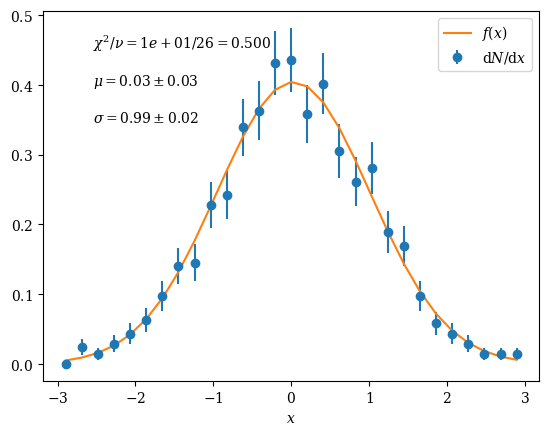

In [43]:
exaCurveFit(1000);

Next, we will change the sample size and plot the reduced $\chi^2$ as a function of the sample size.  We do this in logarithmic steps to more clearly see the evolution 

Derefter vil vi ændre prøvestørrelsen og tegne det reducerede $\chi^2$ som funktion af prøvestørrelsen. Vi gør dette i logaritmiske trin for at tydeliggøre udviklingen

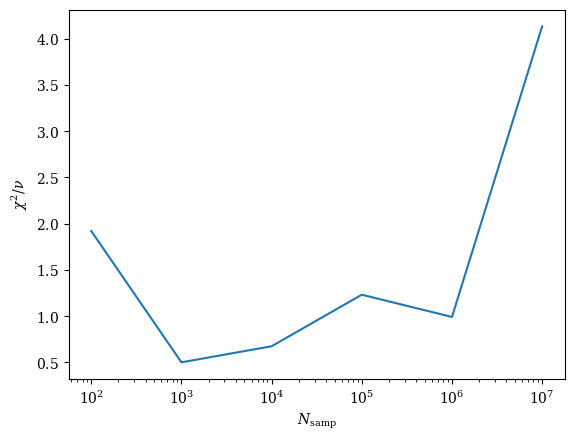

In [44]:
from numpy import logspace
from matplotlib.pyplot import xscale 
ns = logspace(2,7,6)
rs = [exaCurveFit(int(n),False) for n in ns]
cr = [chi2/nu for chi2,nu,_,_ in rs]
plot(ns,cr)
xscale('log')
xlabel(r'$N_{\mathrm{samp}}$')
ylabel(r'$\chi^2/\nu$');

- [`numpy.logspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
- [_list comprehension_](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)

## Example: More on covariance

## Eksempel: Mere om kovarians

Above, we saw that the uncertainty on the fitted parameters are given by the root of the diagonal elements of the covariance matrix

Ovenfor så vi, at usikkerheden om på de fundne parametreværdier er givet af kvadartroden af diagonalelementerne i kovariansmatricen

$$e_i = \sqrt{C_{i,i}}\quad.$$

However, we can learn more from the covariance matrix. In particular, we can tell if the free parameters of the hypothesis are correlated.  To do that, we calculate Pearson's correlation coefficient 

Vi kan dog lære mere fra kovariansmatrixcen. Vi kan især se om de frie parametre i hypotesen er korrelerede. For at gøre det beregner vi Pearsons korrelationskoefficient

$$\rho_{a,b} = \frac{C_{a,b}}{\sqrt{C_{a,a}C_{b,b}}}\quad,$$

or, the covariance between $a$ and $b$, scaled by the product of the standard deviations of $a$ and $b$.  We can illustrate the covariance between two parameters of our hypothesis by drawing _confidence contours_. Each such contour correspond to a step of $e_i$ in the parameter values. 

eller kovariansen mellem $a$ og $b$, skaleret med produktet af standardafvigelserne for $a$ og $b$. Vi kan illustrere kovariansen mellem to parametre i vores hypotese ved at tegne _tillidskonturer_ (_confidense contours_). Hver sådan en kontur svarer til en stigning på $e_i$ i parametreværdierne.

Let us draw the confidence contours for the fit we performed above.  First, we re-run the fit to get the $\chi^2$, $\nu$, $\vec{p}$ and $C$

Lad os tegne tillidskonturerne for den kurvetilpasning vi udførte ovenfor. Først kører vi vores funktion igen for at få $\chi^2$, $\nu$, $\vec{p}$ og $C$

In [45]:
chi2, nu, p, cov = exaCurveFit(1000,False)

Next, we calculate Pearson's coefficient 

Derefter beregner vi Pearsons koefficient

In [46]:
rho = cov[0,1]/sqrt(cov[0,0]*cov[1,1])

Confidence contours are by nature ellipse, so we will draw them as such.   We set the first and second radii to be 

Tillidskonturer er af natur ellipser, så vi tegner dem som sådan. Vi sætter den første og anden radius til at være

$$r_1 = 2e_1\sqrt{1 + \rho}\qquad r_2 = 2e_2\sqrt{1-\rho}\quad,$$

In [47]:
r = 2*sqrt(cov.diagonal()*([1+rho,1-rho]))

and we should turn the ellipse by $\varphi=\tan^{-1}\rho$.

og vi skal vende ellipsen med $\varphi=\tan^{-1}\rho$.

In [48]:
from numpy import arctan, rad2deg
phi = arctan(rho)

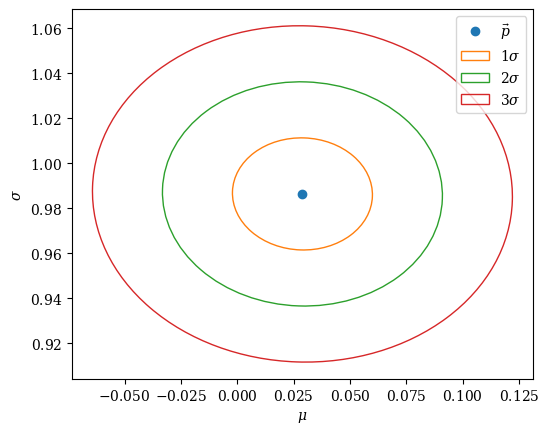

In [49]:
from matplotlib.patches import Ellipse
from matplotlib.pyplot import gca, autoscale

plot(p[0],p[1],'o',label=r'$\vec{p}$')
for nsig in [1,2,3]:
    e = Ellipse(p, *(nsig*r), angle=rad2deg(phi),
                facecolor='none',edgecolor='C'+str(nsig),
                label=fr'${nsig}\sigma$')
    gca().add_patch(e)

gca().set_aspect('equal')
autoscale()
xlabel(r'$\mu$')
ylabel(r'$\sigma$')
legend();

## Example: More on the reduced $\chi^2$

## Eksempel: Mere om det reduceret $\chi^2$

The $\chi^2$ estimator has, under reasonable assumptions, a specific probability distribution

$\chi^2$-estimatoren har under rimelige antagelser en specifik sandsynlighedsfordeling

$$ P_{\chi^2}(x,\nu) = \frac{1}{2^{\nu/2}\Gamma(\nu/2)}x^{\nu/2-1}e^{-x/2}\quad,$$

where $\Gamma$ is the generalised factorial function.  We can thus calculate the probability (or $p$-value) of a fit as the probability of getting the same or _larger_ $\chi^2$ for a given $\nu$, 

hvor $\Gamma$ er den generaliserede faktorie funktion. Vi kan således beregne sandsynligheden (eller $p$-værdien) for en kurvetilpasning som sandsynligheden for at få den samme eller _større_ $\chi^2$ for en given $\nu$,

$$p = \int_{\chi^2}^{\infty}\mathrm{d}x\,P_{\chi^2}(x;\nu) = 1 - \int_0^{\chi^2}\mathrm{d}x\,P_{\chi^2}(x;\nu)\quad.$$

This looks scary at first, but fortunately we have a function in _SciPy_ that will calculate this for us

Dette ser skræmmende ud i starten, men heldigvis har vi en funktion i _SciPy_, der beregner dette for os

In [50]:
from scipy.stats import chi2 as chisquare
print('Probabiity of chi2={} for nu={}: {:.1f}%'
      .format(chi2,nu,chisquare.sf(chi2,nu)*100))

Probabiity of chi2=12.992161963181012 for nu=26: 98.4%


We see that we have a low probability which indicates a "bad" fit.  Let us evaluate the probability in case $\chi^2=\nu$ 

Vi ser, at vi har en lav sandsynlighed, der indikerer en "dårlig" kurvetilpasning. Lad os evalurer sandsynligheden i tilfælde af at $\chi^2=\nu$

In [51]:
print('Probability of reduced chi2=1 for nu={}: {:.1f}%'
      .format(nu,chisquare.sf(nu,nu)*100))

Probability of reduced chi2=1 for nu=26: 46.3%


which is close to $50\%$.  Thus, we say we have a "good" fit if the probability of getting a lower or higher $\chi^2$ are more or less equal.  The found probability of $20\%$ means, that if our hypothesis is correct, then $20\%$ of the time we would find a lower $\chi^2$, while $80\%$ of the time we would find a higher $\chi^2$

som er tæt på $50\%$. Således siger vi, at vi har en "god" kurvetilpasning, hvis sandsynligheden for at få en lavere eller højere $\chi^2$ er mere eller mindre ens. Den fundne sandsynlighed for $20\%$ betyder, at hvis vores hypotese er korrekt, så vil vi $20\%$ af tiden finde et lavere $\chi^2$, mens $80\%$ af tiden vil vi finde et højere $\chi^2$